In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import compare_psnr as psnr
from skimage.measure import compare_ssim as ssim

from super_resolution_test import *

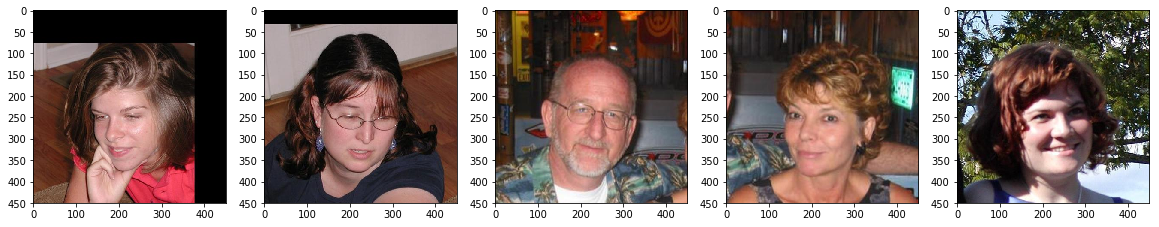

In [2]:
# A simple function for loading images

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# A simple function for visualization
def comparing_images(image1, image2, image3, image4, image5):
    _ = plt.figure(figsize=(20,15))
    _ = plt.subplot(1,5,1)
    _ = plt.imshow(image1)
    _ = plt.subplot(1,5,2)
    _ = plt.imshow(image2)
    _ = plt.subplot(1,5,3)
    _ = plt.imshow(image3)
    _ = plt.subplot(1,5,4)
    _ = plt.imshow(image4)
    _ = plt.subplot(1,5,5)
    _ = plt.imshow(image5)
    plt.show()

#img1 = load_image('sample_images/0002_01.jpg')
#img2 = load_image('sample_images/0007_01.jpg')
#img3 = load_image('sample_images/0009_01.jpg') 
#img4 = load_image('sample_images/0083_01.jpg') 
#img5 = load_image('sample_images/0076_01.jpg')    

img1 = load_image('sample_images_300W/AFW_134212_1.jpg')
img2 = load_image('sample_images_300W/AFW_134212_2.jpg')
img3 = load_image('sample_images_300W/AFW_261068_1.jpg') 
img4 = load_image('sample_images_300W/AFW_261068_2.jpg') 
img5 = load_image('sample_images_300W/AFW_815038_1.jpg')    

comparing_images(img1, img2, img3, img4, img5)

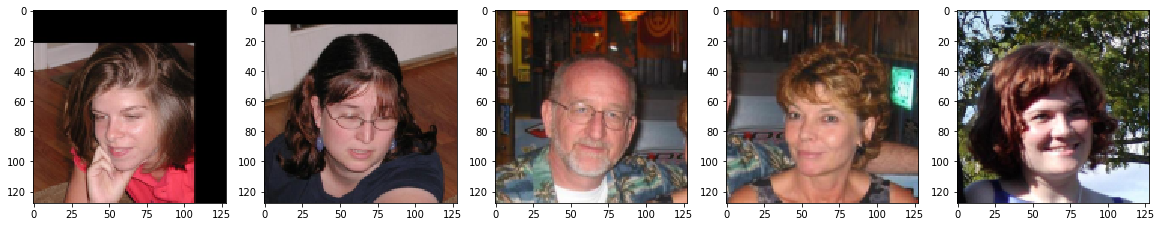

In [3]:
# Reference Images 

reference_img1 = cv2.resize(img1, (128, 128), interpolation=cv2.INTER_AREA)
reference_img2 = cv2.resize(img2, (128, 128), interpolation=cv2.INTER_AREA)
reference_img3 = cv2.resize(img3, (128, 128), interpolation=cv2.INTER_AREA)
reference_img4 = cv2.resize(img4, (128, 128), interpolation=cv2.INTER_AREA)
reference_img5 = cv2.resize(img5, (128, 128), interpolation=cv2.INTER_AREA)

comparing_images(reference_img1, reference_img2, reference_img3, reference_img4, reference_img5)

In [24]:
cv2.imwrite('results/test_images_128_ref/img1.png', reference_img1[...,::-1])
cv2.imwrite('results/test_images_128_ref/img2.png', reference_img2[...,::-1])
cv2.imwrite('results/test_images_128_ref/img3.png', reference_img3[...,::-1])
cv2.imwrite('results/test_images_128_ref/img4.png', reference_img4[...,::-1])
cv2.imwrite('results/test_images_128_ref/img5.png', reference_img5[...,::-1])

True

### Experiments with 32x32

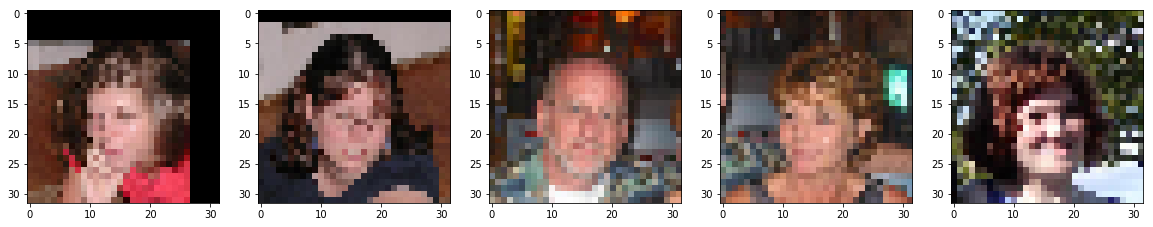

In [4]:
# Downscaling images usig resize function from OpenCV

down_scale = 32

resized_img1 = cv2.resize(img1,(down_scale,down_scale))
resized_img2 = cv2.resize(img2,(down_scale,down_scale))
resized_img3 = cv2.resize(img3,(down_scale,down_scale))
resized_img4 = cv2.resize(img4,(down_scale,down_scale))
resized_img5 = cv2.resize(img5,(down_scale,down_scale))

comparing_images(resized_img1, resized_img2, resized_img3, resized_img4, resized_img5)

In [26]:
# Saving images for comparison of methods

cv2.imwrite('results/test_images_32/img1.png', resized_img1[...,::-1])
cv2.imwrite('results/test_images_32/img2.png', resized_img2[...,::-1])
cv2.imwrite('results/test_images_32/img3.png', resized_img3[...,::-1])
cv2.imwrite('results/test_images_32/img4.png', resized_img4[...,::-1])
cv2.imwrite('results/test_images_32/img5.png', resized_img5[...,::-1])

True

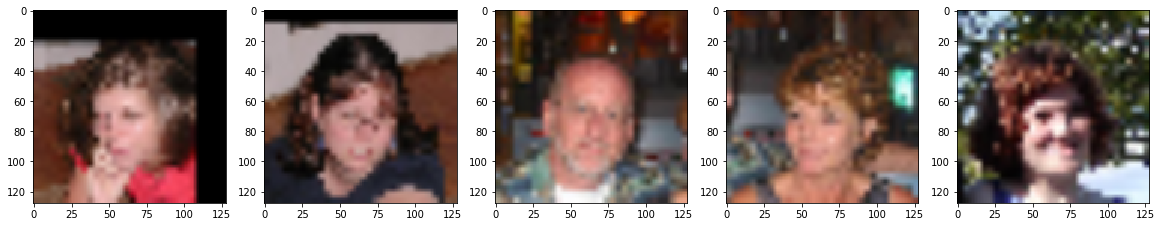

In [5]:
# Upscaling images with Bilinear interpolation

up_scale = 4

up_linear_img1 = cv2.resize(resized_img1, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img2 = cv2.resize(resized_img2, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img3 = cv2.resize(resized_img3, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img4 = cv2.resize(resized_img4, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img5 = cv2.resize(resized_img5, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)


comparing_images(up_linear_img1, up_linear_img2, up_linear_img3, up_linear_img4, up_linear_img5)

In [29]:
cv2.imwrite('results/test_images_128_bilinear/img1.png', up_linear_img1[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img2.png', up_linear_img2[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img3.png', up_linear_img3[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img4.png', up_linear_img4[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img5.png', up_linear_img5[...,::-1])

True

In [10]:
# PSNR and SSIM - Bilinear Interpolation

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_linear_img1), ssim(reference_img1, up_linear_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_linear_img2), ssim(reference_img2, up_linear_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_linear_img3), ssim(reference_img3, up_linear_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_linear_img4), ssim(reference_img4, up_linear_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_linear_img5), ssim(reference_img5, up_linear_img5, multichannel=True)))

Image1 - PSNR and SSIM: 25.086 and 0.755
Image2 - PSNR and SSIM: 23.402 and 0.740
Image3 - PSNR and SSIM: 24.437 and 0.700
Image4 - PSNR and SSIM: 24.838 and 0.720
Image5 - PSNR and SSIM: 18.353 and 0.607


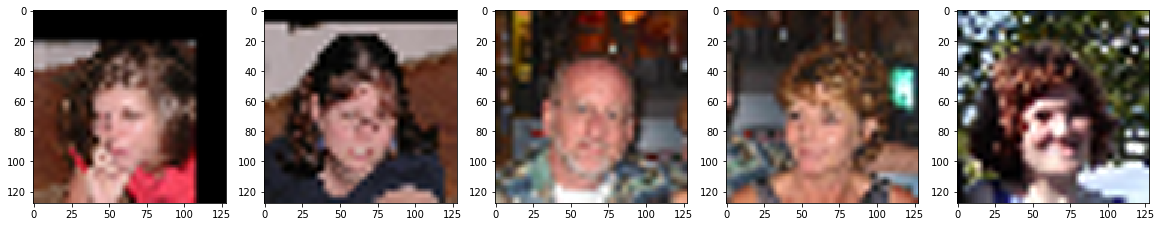

In [7]:
# Upscaling images with Bicubic interpolation

up_cubic_img1 = cv2.resize(resized_img1, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img2 = cv2.resize(resized_img2, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img3 = cv2.resize(resized_img3, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img4 = cv2.resize(resized_img4, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img5 = cv2.resize(resized_img5, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)

comparing_images(up_cubic_img1, up_cubic_img2, up_cubic_img3, up_cubic_img4, up_cubic_img5)

In [31]:
cv2.imwrite('results/test_images_128_bicubic/img1.png', up_cubic_img1[...,::-1])
cv2.imwrite('results/test_images_128_bicubic/img2.png', up_cubic_img2[...,::-1])
cv2.imwrite('results/test_images_128_bicubic/img3.png', up_cubic_img3[...,::-1])
cv2.imwrite('results/test_images_128_bicubic/img4.png', up_cubic_img4[...,::-1])
cv2.imwrite('results/test_images_128_bicubic/img5.png', up_cubic_img5[...,::-1])

True

In [13]:
# PSNR and SSIM - Bicubic Interpolation

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_cubic_img1), ssim(reference_img1, up_cubic_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_cubic_img2), ssim(reference_img2, up_cubic_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_cubic_img3), ssim(reference_img3, up_cubic_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_cubic_img4), ssim(reference_img4, up_cubic_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_cubic_img5), ssim(reference_img5, up_cubic_img5, multichannel=True)))

Image1 - PSNR and SSIM: 24.673 and 0.747
Image2 - PSNR and SSIM: 23.017 and 0.727
Image3 - PSNR and SSIM: 23.999 and 0.696
Image4 - PSNR and SSIM: 24.574 and 0.722
Image5 - PSNR and SSIM: 17.603 and 0.602


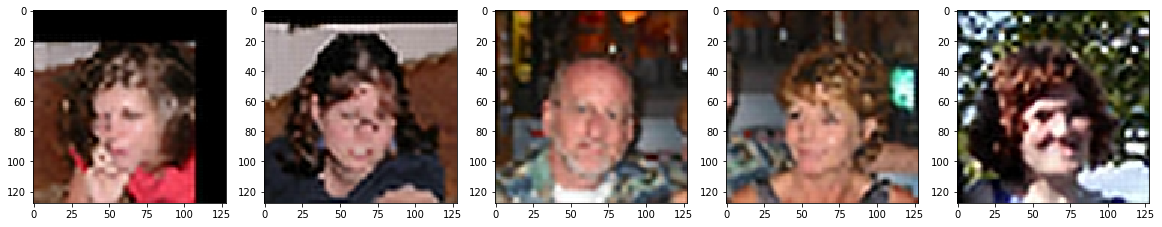

In [9]:
# Upscaling images with SubPixelCNN

up_CNN_img1 = super_resolve('results/test_images_32/img1.png', up_scale)
up_CNN_img2 = super_resolve('results/test_images_32/img2.png', up_scale)
up_CNN_img3 = super_resolve('results/test_images_32/img3.png', up_scale)
up_CNN_img4 = super_resolve('results/test_images_32/img4.png', up_scale)
up_CNN_img5 = super_resolve('results/test_images_32/img5.png', up_scale)

comparing_images(up_CNN_img1, up_CNN_img2, up_CNN_img3, up_CNN_img4, up_CNN_img5)

In [33]:
cv2.imwrite('results/test_images_128_CNN/img1.png', up_CNN_img1[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img2.png', up_CNN_img2[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img3.png', up_CNN_img3[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img4.png', up_CNN_img4[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img5.png', up_CNN_img5[...,::-1])

True

In [17]:
# PSNR and SSIM - SubPixel CNN

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_CNN_img1), ssim(reference_img1, up_CNN_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_CNN_img2), ssim(reference_img2, up_CNN_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_CNN_img3), ssim(reference_img3, up_CNN_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_CNN_img4), ssim(reference_img4, up_CNN_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_CNN_img5), ssim(reference_img5, up_CNN_img5, multichannel=True)))

Image1 - PSNR and SSIM: 23.972 and 0.737
Image2 - PSNR and SSIM: 22.225 and 0.688
Image3 - PSNR and SSIM: 22.811 and 0.661
Image4 - PSNR and SSIM: 23.301 and 0.699
Image5 - PSNR and SSIM: 16.291 and 0.559


In [34]:
cv2.imwrite('results/test_images_128_bicubic/img3.jpg', up_cubic_img3[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img3.jpg', up_linear_img3[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img3.jpg', up_CNN_img3[...,::-1])

True

### Experiments with 64x64 - Upscale 2x

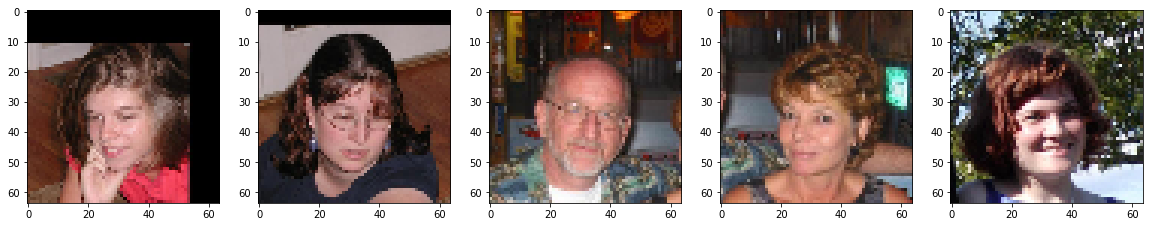

In [11]:
# Downscaling images usig resize function from OpenCV

down_scale = 64

resized_img1 = cv2.resize(img1,(down_scale,down_scale))
resized_img2 = cv2.resize(img2,(down_scale,down_scale))
resized_img3 = cv2.resize(img3,(down_scale,down_scale))
resized_img4 = cv2.resize(img4,(down_scale,down_scale))
resized_img5 = cv2.resize(img5,(down_scale,down_scale))

comparing_images(resized_img1, resized_img2, resized_img3, resized_img4, resized_img5)

In [4]:
# Saving images for comparison of methods

cv2.imwrite('results/test_images_64/img1.png', resized_img1[...,::-1])
cv2.imwrite('results/test_images_64/img2.png', resized_img2[...,::-1])
cv2.imwrite('results/test_images_64/img3.png', resized_img3[...,::-1])
cv2.imwrite('results/test_images_64/img4.png', resized_img4[...,::-1])
cv2.imwrite('results/test_images_64/img5.png', resized_img5[...,::-1])

True

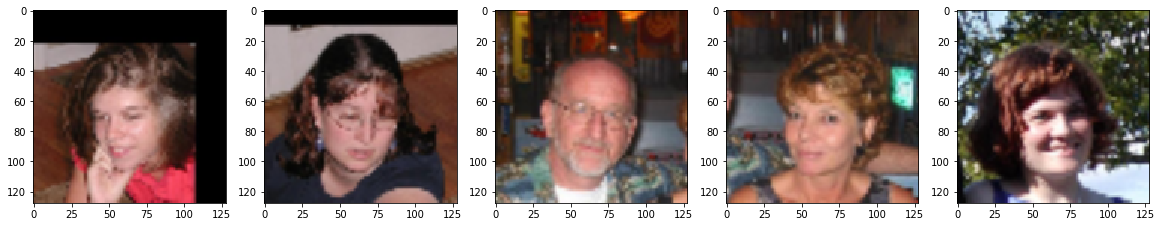

In [13]:
# Upscaling images with Bilinear interpolation

up_scale = 2

up_linear_img1 = cv2.resize(resized_img1, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img2 = cv2.resize(resized_img2, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img3 = cv2.resize(resized_img3, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img4 = cv2.resize(resized_img4, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)
up_linear_img5 = cv2.resize(resized_img5, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_LINEAR)


comparing_images(up_linear_img1, up_linear_img2, up_linear_img3, up_linear_img4, up_linear_img5)

In [10]:
# PSNR and SSIM - Bilinear Interpolation

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_linear_img1), ssim(reference_img1, up_linear_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_linear_img2), ssim(reference_img2, up_linear_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_linear_img3), ssim(reference_img3, up_linear_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_linear_img4), ssim(reference_img4, up_linear_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_linear_img5), ssim(reference_img5, up_linear_img5, multichannel=True)))

Image1 - PSNR and SSIM: 29.693 and 0.896
Image2 - PSNR and SSIM: 27.891 and 0.894
Image3 - PSNR and SSIM: 29.232 and 0.883
Image4 - PSNR and SSIM: 29.501 and 0.903
Image5 - PSNR and SSIM: 21.755 and 0.817


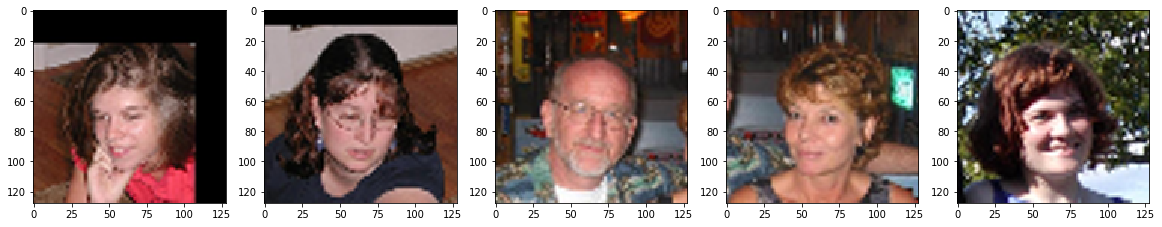

In [15]:
# Upscaling images with Bicubic interpolation

up_cubic_img1 = cv2.resize(resized_img1, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img2 = cv2.resize(resized_img2, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img3 = cv2.resize(resized_img3, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img4 = cv2.resize(resized_img4, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)
up_cubic_img5 = cv2.resize(resized_img5, None, fx = up_scale, fy = up_scale, interpolation = cv2.INTER_CUBIC)

comparing_images(up_cubic_img1, up_cubic_img2, up_cubic_img3, up_cubic_img4, up_cubic_img5)

In [12]:
# PSNR and SSIM - Bicubic Interpolation

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_cubic_img1), ssim(reference_img1, up_cubic_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_cubic_img2), ssim(reference_img2, up_cubic_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_cubic_img3), ssim(reference_img3, up_cubic_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_cubic_img4), ssim(reference_img4, up_cubic_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_cubic_img5), ssim(reference_img5, up_cubic_img5, multichannel=True)))

Image1 - PSNR and SSIM: 29.374 and 0.894
Image2 - PSNR and SSIM: 27.466 and 0.886
Image3 - PSNR and SSIM: 29.020 and 0.888
Image4 - PSNR and SSIM: 29.361 and 0.910
Image5 - PSNR and SSIM: 20.965 and 0.817


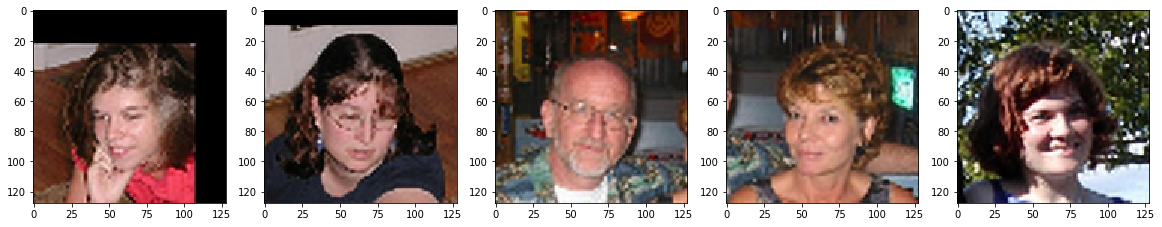

In [17]:
# Upscaling images with SubPixelCNN

up_CNN_img1 = super_resolve('results/test_images_64/img1.png', up_scale)
up_CNN_img2 = super_resolve('results/test_images_64/img2.png', up_scale)
up_CNN_img3 = super_resolve('results/test_images_64/img3.png', up_scale)
up_CNN_img4 = super_resolve('results/test_images_64/img4.png', up_scale)
up_CNN_img5 = super_resolve('results/test_images_64/img5.png', up_scale)

comparing_images(up_CNN_img1, up_CNN_img2, up_CNN_img3, up_CNN_img4, up_CNN_img5)

In [13]:
# PSNR and SSIM - SubPixel CNN

print('Image1 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img1, up_CNN_img1), ssim(reference_img1, up_CNN_img1, multichannel=True)))
print('Image2 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img2, up_CNN_img2), ssim(reference_img2, up_CNN_img2, multichannel=True)))
print('Image3 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img3, up_CNN_img3), ssim(reference_img3, up_CNN_img3, multichannel=True)))
print('Image4 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img4, up_CNN_img4), ssim(reference_img4, up_CNN_img4, multichannel=True)))
print('Image5 - PSNR and SSIM: %.3f and %.3f' %(psnr(reference_img5, up_CNN_img5), ssim(reference_img5, up_CNN_img5, multichannel=True)))

Image1 - PSNR and SSIM: 28.619 and 0.883
Image2 - PSNR and SSIM: 25.789 and 0.865
Image3 - PSNR and SSIM: 28.039 and 0.873
Image4 - PSNR and SSIM: 28.302 and 0.896
Image5 - PSNR and SSIM: 20.028 and 0.795


In [14]:
cv2.imwrite('results/test_images_128_bicubic/img3_64.jpg', up_cubic_img3[...,::-1])
cv2.imwrite('results/test_images_128_bilinear/img3_64.jpg', up_linear_img3[...,::-1])
cv2.imwrite('results/test_images_128_CNN/img3_64.jpg', up_CNN_img3[...,::-1])

True